In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


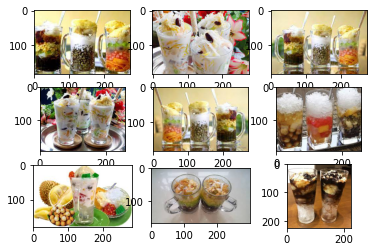

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Train_AI/Food/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'che_'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Colab Notebooks/Train_AI/Food/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Banh_bao'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Banh_beo'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Banh_mi'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Bo_kho'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Bun_dau'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Ca_kho'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Che'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Com'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
  
for file in listdir(folder):
  if file.startswith('Ga_luoc'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Lau'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10Food_photos.npy', photos)
save('10Food_labels.npy', labels)

(120, 200, 200, 3) (120,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
 history = model.fit(photos, labels, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 3s 198ms/step - loss: 1642.4938 - accuracy: 0.1500
Epoch 2/1000
4/4 [==============================] - 0s 72ms/step - loss: 1002.9285 - accuracy: 0.2167
Epoch 3/1000
4/4 [==============================] - 0s 67ms/step - loss: 113.9559 - accuracy: 0.2917
Epoch 4/1000
4/4 [==============================] - 0s 69ms/step - loss: 5.0513 - accuracy: 0.5083
Epoch 5/1000
4/4 [==============================] - 0s 70ms/step - loss: 0.8408 - accuracy: 0.7667
Epoch 6/1000
4/4 [==============================] - 0s 71ms/step - loss: 0.5019 - accuracy: 0.8917
Epoch 7/1000
4/4 [==============================] - 0s 70ms/step - loss: 0.1350 - accuracy: 0.9917
Epoch 8/1000
4/4 [==============================] - 0s 70ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 9/1000
4/4 [==============================] - 0s 70ms/step - loss: 0.0172 - accuracy: 0.9917
Epoch 10/1000
4/4 [==============================] - 0s 68ms/step - loss: 8.6718e-04 - accuracy: 1.0

In [ ]:
model.evaluate(photos,labels)

4/4 [==============================] - 0s 37ms/step - loss: 2.2848e-08 - accuracy: 1.0000


[2.284842715027935e-08, 1.0]

In [ ]:
model.save('Food_Final.h5')

In [ ]:
from keras.models import load_model
models=load_model('Food_Final.h5')

In [ ]:
classes = ["Banh_bao","Banh_beo","Banh_mi","Bo_kho","Bun_dau","Ca_kho","Che","Com","Ga_luoc","Lau"]

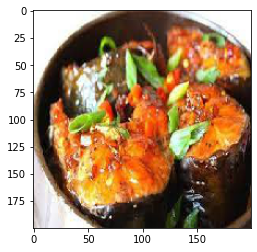

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('Ca_kho_3.jpg', target_size=(200,200))
plt.imshow(img)

In [ ]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.07936295 0.10188019 0.1075009  0.10627161 0.05065262 0.1392958
  0.06661538 0.07744741 0.08302626 0.11520881 0.07273802]]


'Ca_kho'